## Information
Matthew Blasa 
<br>
Student ID: 001781641
<br>
MS Data Analytics (05/01/2021)
<br>
Program Mentor: Kirk Kelly 
<br>
(503)805-0297
<br>
mblasa@wgu.edu

## A1. Question to Analyze

What is the average amount of data that we estimate the customer will use in the future?   Can this be predicted accurately from a list of explanatory variables?

# A2 Analysis Benefits

Stakeholders in the company will benefit by knowing what factors affect the average amount of GB used in a year by the customer. This will provide insight for decisions in whether or not to expand customer data limits, provide unlimited (or metered) media streaming, and expand infrastructure and maintenance support for increased bandwidth demands.

# Regression Methods

## B1. Assumptions of Logistic Regression Model

* Linear relationship between the dependent and independent variables.
* The independent variables are not too highly correlated with each other.
* Observations are selected independently & randomly from the population.
* Residuals should normally be distributed with a mean of zero. The variance of the residuals is constant

## B2. Benefits of Using Python

I will use the Python, since I use it at work to perform EDAs and clean data. I'll be using jupyter notebook, since it allows me to use markdowns to answer questions and program at the same time. To save time, I will be using several data science Python libraries to simply the problem. The following will be used:

* NumPy - to work with arrays
* Pandas - used to create dataframes.
* Matplotlib - plotting charts
* Scikit-learn - for PCA, Machine Learning, and Normalization.
* SciPy - used for mathematical transformations.
* Seaborn - visualization of more complex graphs

## B3. Justification
Multiple regression is an appropriate technique to analyze the research question because our target variable, predicting a real number of GBs per year, is a continuous variable.

Several explanatory variables help to predict how much data a customer will use in a given year. When adding or removing independent variables from our regression equation, we determine whether or not they have a positive or negative relationship to our target variable. 

## C2. Summary Statistics
Summary statistics analysed & discussed below, including the target variable and all predictor variables needed to gather from the dataset to answer the research question.

## C3. Steps to Prepare the Data

This project  uses the data that was previously cleaned in the Data Cleaning Assignment.  The majority of the  data set is used to determine the amount of average amount of data used, in GB, in a year by the customer. I plan to reduce the list of variables not by what might intuitively belong together, but by looking at numerical calculations that suggest which variables are significant to answering the research question. With variables, I aim to get a predictive model to assist the telecommunications company to predict customers and target customers who use the most 

The following steps will be taken to prepare the data for analysis:

1. Import data to pandas dataframe
2. Determine variable types and those which may require further investigation
3. Convert binary variables to  yes = 1 and no = 0
4. Investigate potential categorical variables using bar charts, then convert categorical values to dummy variables
5. Drop columns that will not be used in regression analysis


My approach will include:
1. Import data to pandas dataframe
2. Determine variable types and those which may require further investigation
3. Convert binary variables to  yes = 1 and no = 0
4. Investigate potential categorical variables using bar charts, then convert categorical values to dummy variables
5. Drop columns that will not be used in regression analysis
6. Find outliers that may create or hide statistical significance using histograms.
7. Subsitute missing data with meaningful measures of central tendency (mean, median or mode)

Important to the process is the variable of "Bandwidth_GB_Year" (the average yearly amount of data used, in GB, per customer) which will be our target variable.

When analyzing the data we will examine the following continuous predictor variables: 
* Children
* Income
* Outage_sec_perweek
* Email
* Contacts    
* Yearly_equip_failure
* MonthlyCharge
* Bandwidth_GB_Year    
    
We will also examine the following categorical predictor variables:
* Churn: Whether the customer discontinued service within the last month (yes, no)
* Techie: Whether the customer considers themselves technically inclined (based on
customer questionnaire when they signed up for services) (yes, no)
* Contract: The contract term of the customer (month-to-month, one year, two year)
* Port_modem: Whether the customer has a portable modem (yes, no)
* Tablet: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)
* InternetService: Customer’s internet service provider (DSL, fiber optic, None)
* Phone: Whether the customer has a phone service (yes, no)
* Multiple: Whether the customer has multiple lines (yes, no)
* OnlineSecurity: Whether the customer has an online security add-on (yes, no)
* OnlineBackup: Whether the customer has an online backup add-on (yes, no)
* DeviceProtection: Whether the customer has device protection add-on (yes, no)
* TechSupport: Whether the customer has a technical support add-on (yes, no)
* StreamingTV: Whether the customer has streaming TV (yes, no)
* StreamingMovies: Whether the customer has streaming movies (yes, no)
    
We will also examine ordinal predictor variables from the survey responses from customers. In the surveys, customers rated eight customer service factors on a scale from 1 to 8. 
    
* Item1: Timely response
* Item2: Timely fixes
* Item3: Timely replacements
* Item4: Reliability
* Item5: Options
* Item6: Respectful response
* Item7: Courteous exchange
* Item8: Evidence of active listening

##### <u>Step 1</u>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for readability

In [2]:
# Read in dataset and view head
df = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## Step 2

In [3]:
# View list of columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

### Results of Cleaning: 
There are no missing values. The data set is clean and ready to prepare for analysis

<AxesSubplot:>

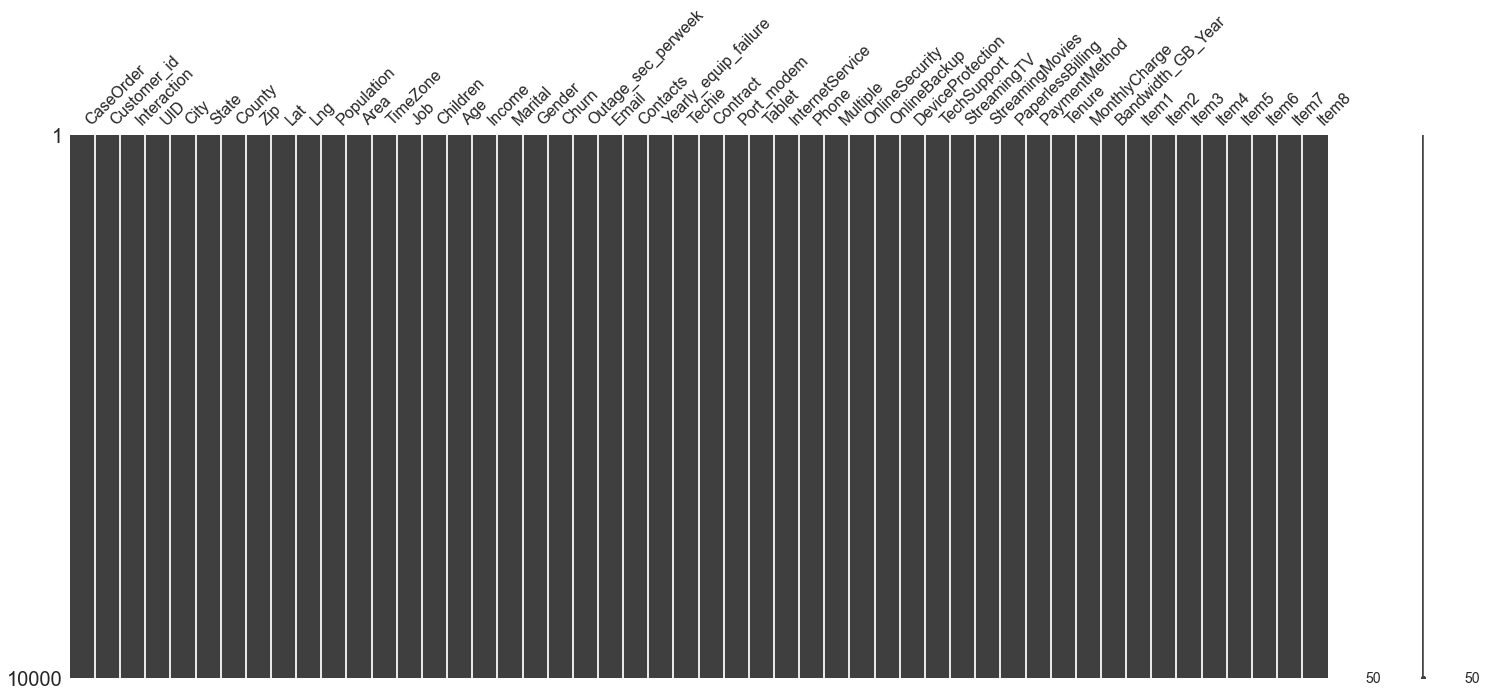

In [5]:
# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df)

## Step 3

In [6]:
# Convert binary variables into yes = 1, no = 0 (ref 1)
cols = ['Marital', 'Gender', 'Churn', 'Techie', 'Port_modem', 'Tablet', 'InternetService','Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df[cols] = df[cols].replace(to_replace = ['No', 'Yes'], value = [0, 1])

In [7]:
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

In [8]:
df['Gender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['InternetService'] = [1 if v == 'Fiber Optic' else 0 for v in df['InternetService']]

## Step 4

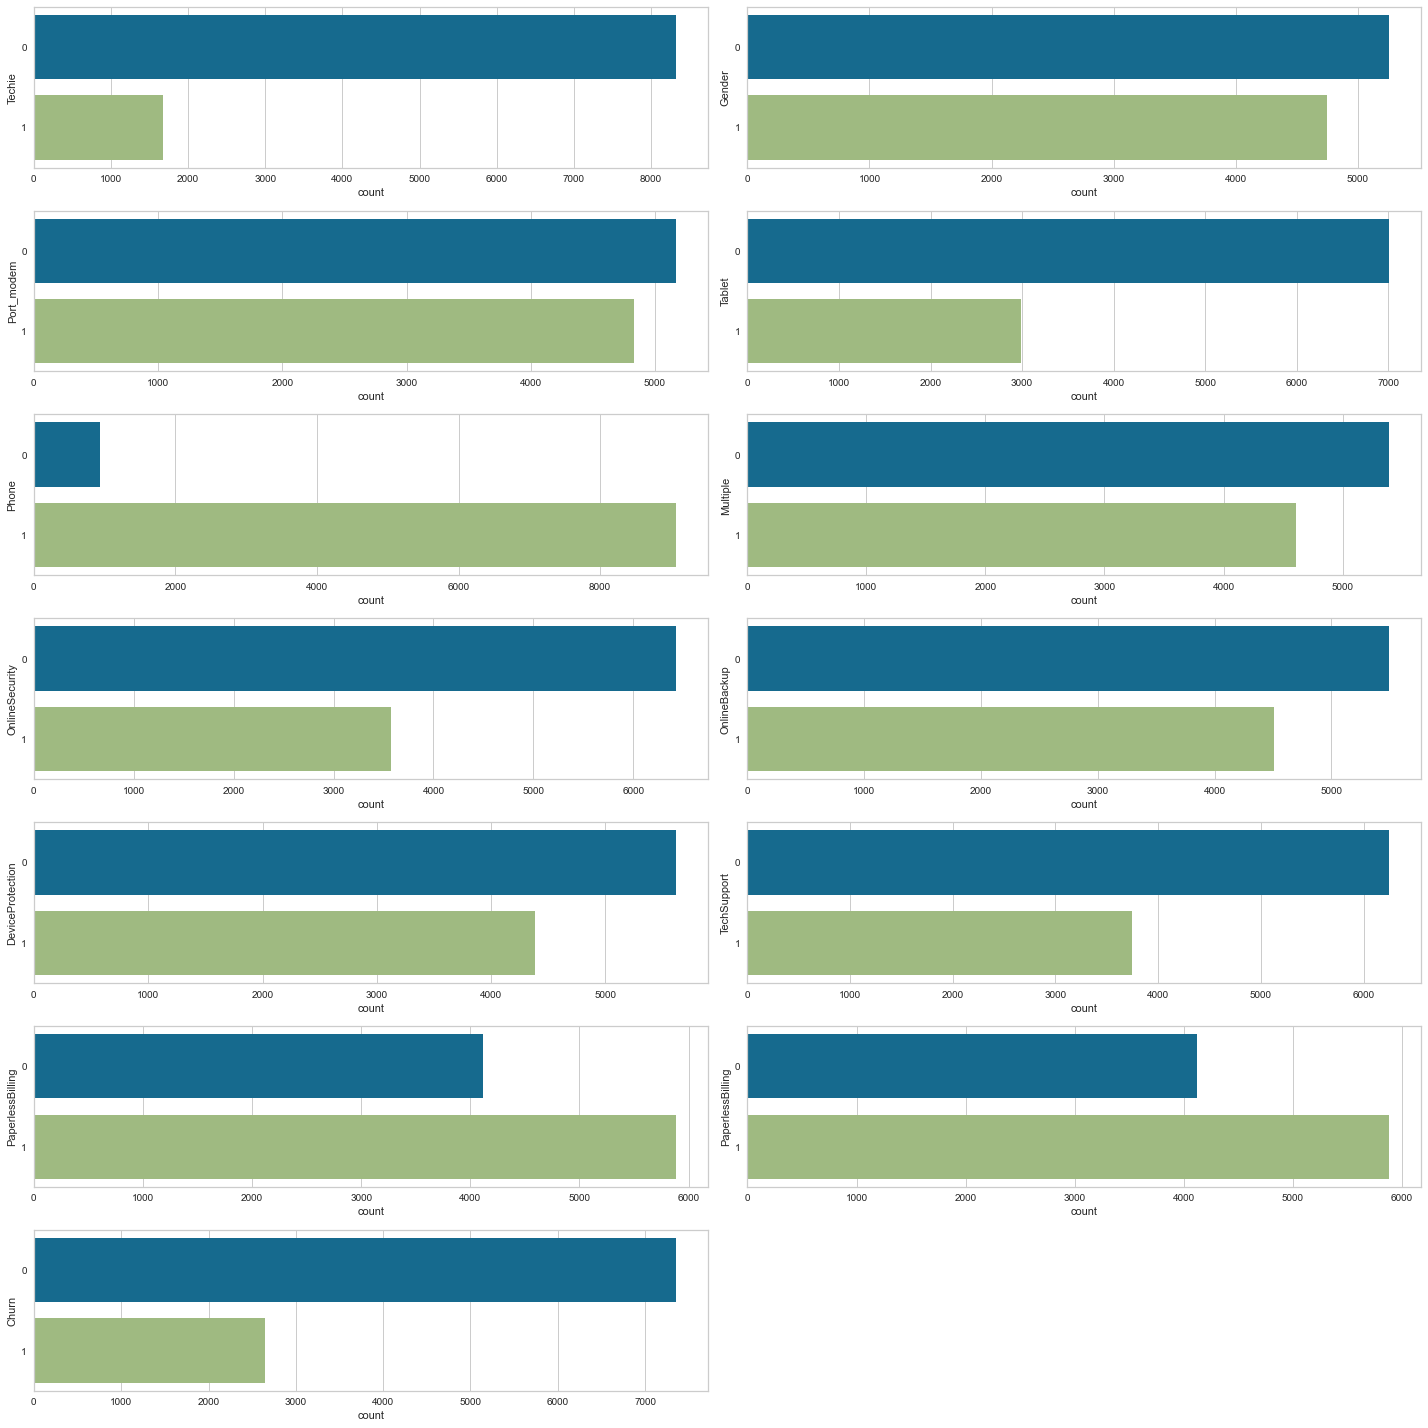

In [9]:
# View bar charts for potential categorical variables to determine number of categories
figure, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,20))
plt.subplot(7, 2, 1) 
sns.countplot(data = df, y = 'Techie') 
plt.subplot(7, 2, 2) 
sns.countplot(data = df, y = 'Gender')
plt.subplot(7, 2, 3) 
sns.countplot(data = df, y =  'Port_modem')
plt.subplot(7, 2, 4) 
sns.countplot(data = df, y = 'Tablet')
plt.subplot(7, 2, 5) 
sns.countplot(data = df, y = 'Phone') 
plt.subplot(7, 2, 6) 
sns.countplot(data = df, y = 'Multiple')
plt.subplot(7, 2, 7) 
sns.countplot(data = df, y = 'OnlineSecurity')
plt.subplot(7, 2, 8) 
sns.countplot(data = df, y = 'OnlineBackup')
plt.subplot(7, 2, 9) 
sns.countplot(data = df, y = 'DeviceProtection')
plt.subplot(7, 2, 10) 
sns.countplot(data = df, y = 'TechSupport')
plt.subplot(7, 2, 11) 
sns.countplot(data = df, y = 'PaperlessBilling')
plt.subplot(7, 2, 12) 
sns.countplot(data = df, y = 'PaperlessBilling')
plt.subplot(7, 2, 13) 
sns.countplot(data = df, y = 'Churn')

plt.subplot(7, 2, 14).set_visible(False)
figure.tight_layout()
plt.show();

- Country appears to currently only have one value, so will be treated as a string.  The remaining variables will be converted into dummy variables.

In [10]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,1,0,7.978323,10,0,1,0,One year,1,1,1,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,0,1,11.699080,12,0,1,1,Month-to-month,0,1,1,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,0,0,10.752800,9,0,1,1,Two Year,1,0,0,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,1,0,14.913540,15,2,0,1,Two Year,0,0,0,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,1,1,8.147417,16,2,1,0,Month-to-month,1,0,1,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,1,0,9.415935,12,2,0,0,Month-to-month,1,1,0,1,1,0,1,1,0,0,0,0,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,1,0,6.740547,15,2,0,0,Two Year,0,0,1,1,1,1,1,1,0,1,0,0,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,0,0,6.590911,10,0,0,0,Month-to-month,0,0,1,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,1,0,12.071910,14,1,0,0,Two Year,0,1,1,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


## Step 5

In [11]:
# Drop columns not needed for analysis
drops = ['CaseOrder', 'Interaction', 'Customer_id', 'UID', 'County', 'State', 'City', 'Zip', 'Lat', 'Lng', 
         'Job', 'TimeZone', 'Area', 'Contract', 'InternetService', 'Marital', 'PaymentMethod']
df2 = df.drop(drops, axis = 1)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Gender                10000 non-null  int64  
 5   Churn                 10000 non-null  int64  
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  int64  
 11  Port_modem            10000 non-null  int64  
 12  Tablet                10000 non-null  int64  
 13  Phone                 10000 non-null  int64  
 14  Multiple              10000 non-null  int64  
 15  OnlineSecurity      

#### VISUALIZATIONS

##### <u>Univariate Visualizations</u>

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Gender                10000 non-null  int64  
 5   Churn                 10000 non-null  int64  
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  int64  
 11  Port_modem            10000 non-null  int64  
 12  Tablet                10000 non-null  int64  
 13  Phone                 10000 non-null  int64  
 14  Multiple              10000 non-null  int64  
 15  OnlineSecurity      

In [14]:
df2.columns

Index(['Population', 'Children', 'Age', 'Income', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

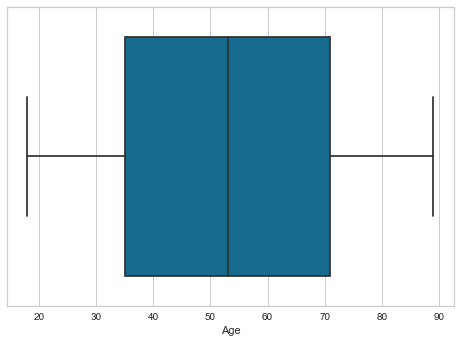

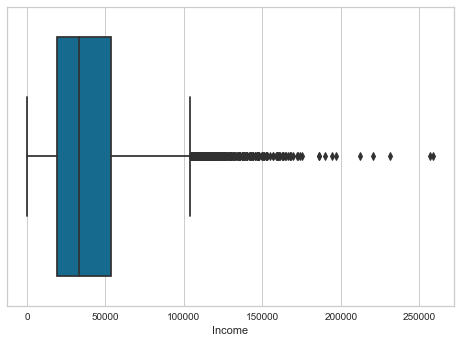

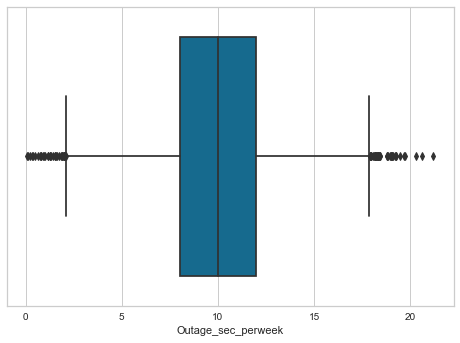

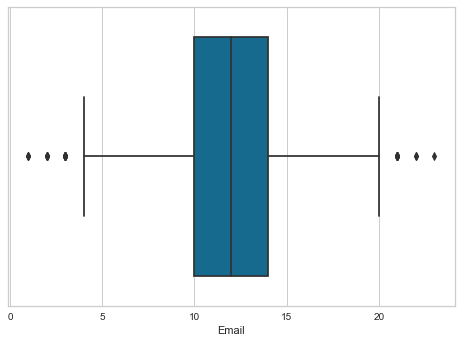

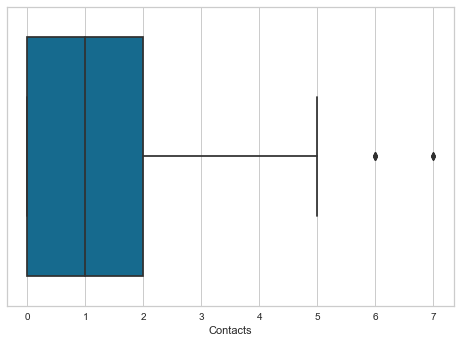

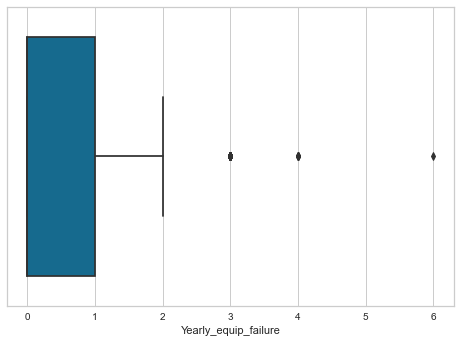

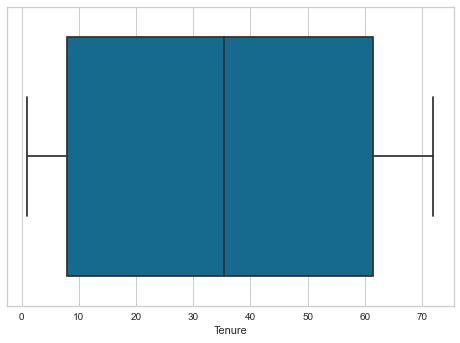

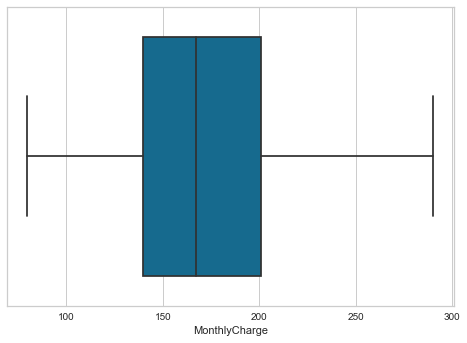

In [15]:
# Display boxplots of numeric columns (ref 2)
cols = ['Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']
for v in cols: 
    sns.boxplot(v, data = df2)
    plt.show()
    print('\n')
    print('\n')

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Churn'}>],
       [<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>,
        <AxesSubplot:title={'center':'Contacts'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Techie'}>,
        <AxesSubplot:title={'center':'Port_modem'}>],
       [<AxesSubplot:title={'center':'Tablet'}>,
        <AxesSubplot:title={'center':'Phone'}>,
        <AxesSubplot:title={'center':'Multiple'}>,
        <AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>],
       [<AxesSubplot:title={'center':'TechSupport'}>,
   

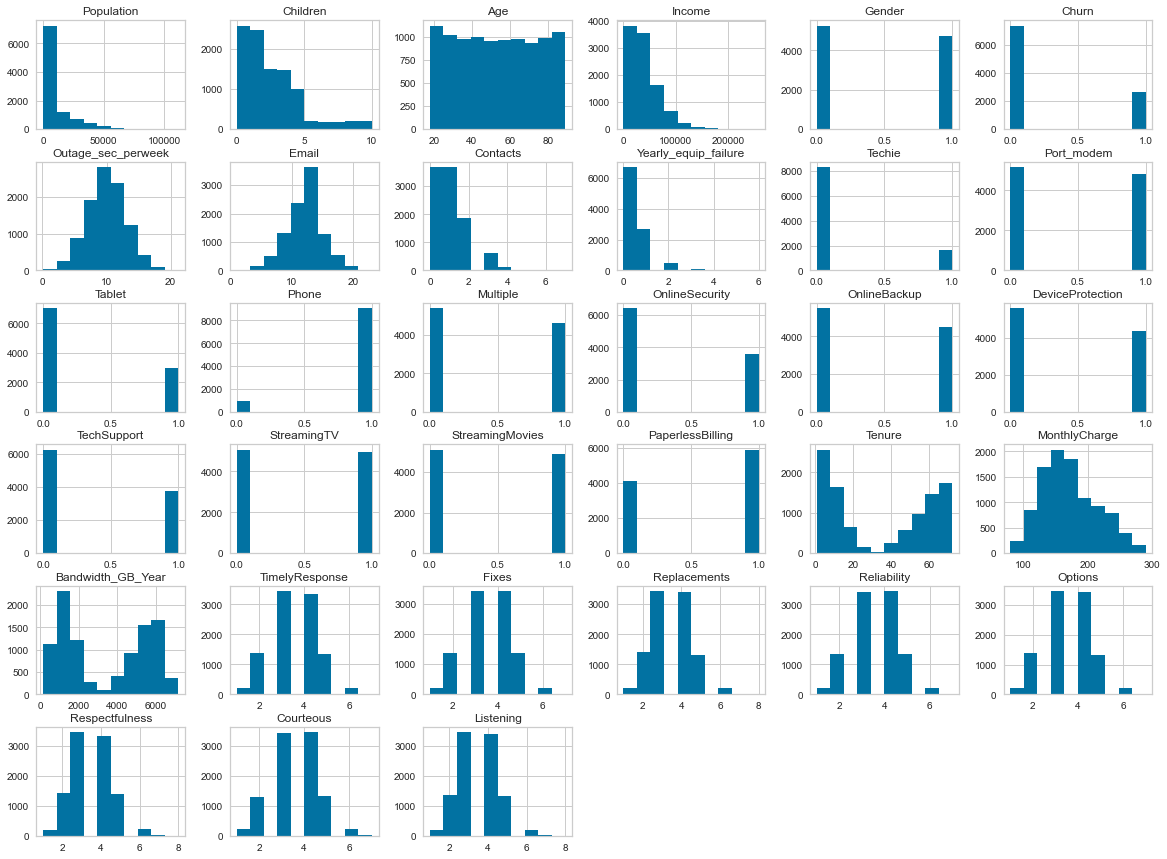

In [16]:
df2.hist(figsize=(20, 15))

##### <u>Bivariate Visualizations</u>

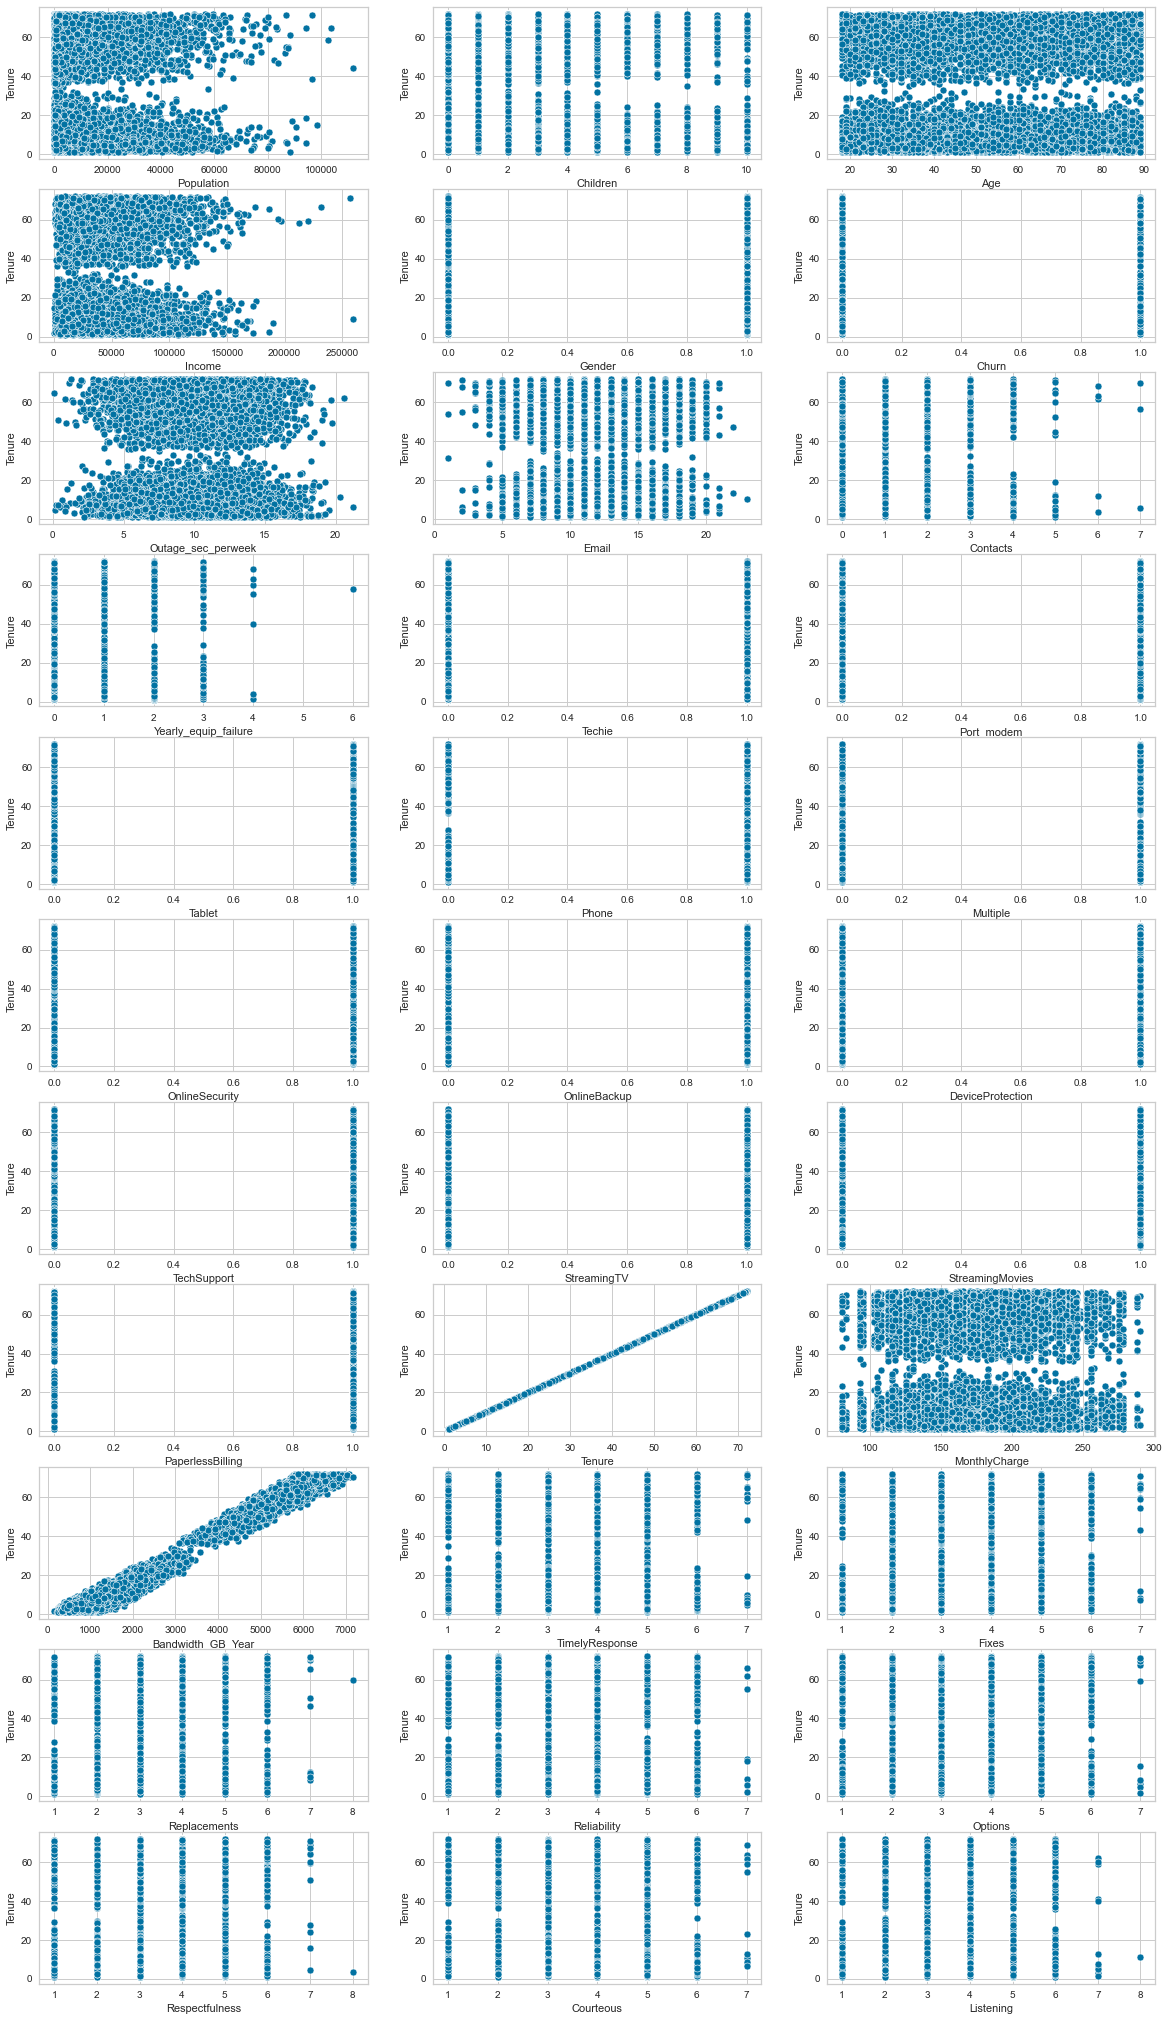

In [17]:
# Plot scatter plots for each predictive variable on the x axis and Tenure on y axis (Ref 3)
count=1
plt.subplots(figsize=(20, 80))
for i in df2.columns:
    plt.subplot(24,3,count)
    sns.scatterplot(df2[i], df2["Tenure"])
    count+=1

plt.show()

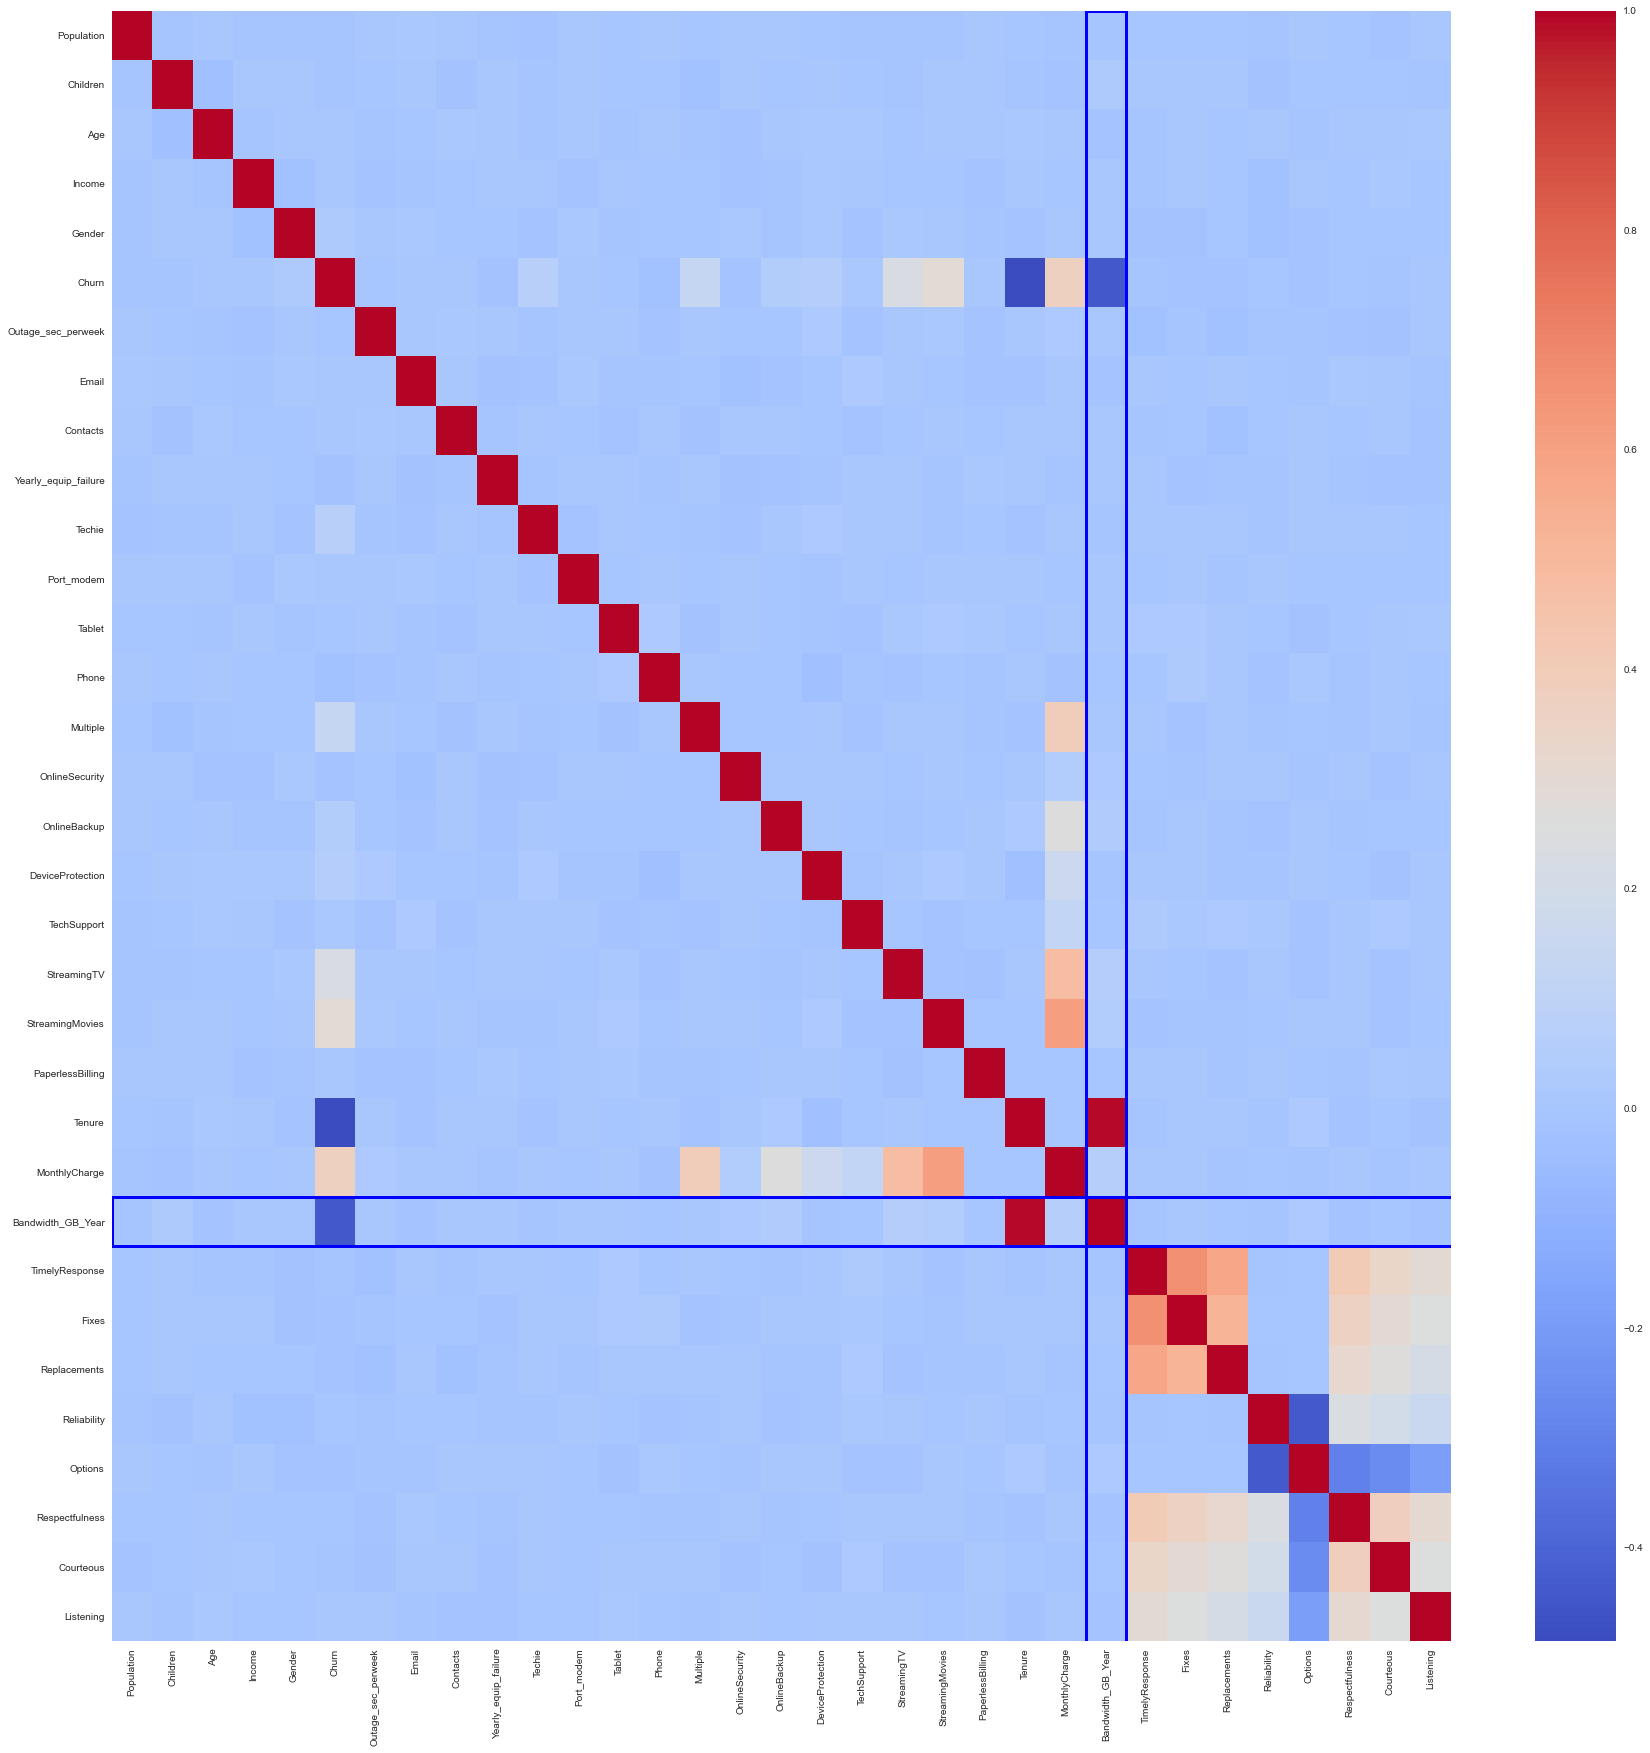

In [18]:
# Display heatmap to view correlation between variables highlighting the Tenure variable (ref 4)
t = df2.columns.get_loc('Bandwidth_GB_Year')
l = len(df.columns)
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(df2.corr(), cmap='coolwarm')
ax.add_patch(Rectangle((t, 0), 1, l, fill=False, edgecolor='blue', lw=3))
ax.add_patch(Rectangle((0, t), l, 1, fill=False, edgecolor='blue', lw=3))
plt.show()

## Prepared Data Set

In [19]:
# Save cleaned dataframe to CSV 
df.to_csv('churn_clean_data_final.csv', index = False, encoding = 'utf-8') 

# D1. Initial Model

#### Initial Model

In [20]:
# Set up input matrix and response variable
df2['intercept'] = 1
observations = len(df2)
variables = df2.columns[:-1]
Xinit1 = df2.iloc[:,:-1]
#Xfin = Xc_init1.drop('Bandwidth_GB_Year', axis = 1)
y = df2['Bandwidth_GB_Year'].values


In [21]:
# Veiw number of independent variables
print ("There are", Xinit1.shape[1], "independent variables in the initial model.")

There are 33 independent variables in the initial model.


In [22]:
# Add y-intercept, create model, and view summary
Xc_init1 = sm.add_constant(Xinit1)
linear_regression = sm.OLS(y,Xc_init1)
fitted_model1 = linear_regression.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.160e+31
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:48:37   Log-Likelihood:             2.4439e+05
No. Observations:               10000   AIC:                        -4.887e+05
Df Residuals:                    9966   BIC:                        -4.885e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.684e-13   7.78e-13      0.731      0.465   -9.56e-13    2.09e-12
Population             3.71e-16   4.09e-18     90.696      0.000    3.63e-16    3.79e-16
Children             -3.355e-13   2.91e-14    -11.543      0.000   -3.92e-13   -2.79e-13
Age                   3.442e-15   3.03e-15      1.135      0.256    -2.5e-15    9.38e-15
Income               -6.245e-17    2.1e-18    -29.804      0.000   -6.66e-17   -5.83e-17
Gender                 4.69e-13    1.2e-13      3.901      0.000    2.33e-13    7.05e-13
Churn                 1.258e-12   1.75e-13      7.201      0.000    9.15e-13     1.6e-12
Outage_sec_perweek   -1.332e-15   1.99e-14     -0.067      0.947   -4.03e-14    3.76e-14
Email                -4.619e-14   1.95e-14     -2.365      0.018   -8.45e-14   -7.91e-15
Contacts             -1.092e-13   5.98e-14     -1.828      0.068   -2.26e-13     7.9e-15
Yearly_equip_failure -4.263e-14   9.29e-14     -0.459      0.646   -2.25e-13    1.39e-13
Techie                1.705e-13   1.58e-13      1.076      0.282    -1.4e-13    4.81e-13
Port_modem           -5.755e-13   1.18e-13     -4.872      0.000   -8.07e-13   -3.44e-13
Tablet               -1.776e-13   1.29e-13     -1.376      0.169   -4.31e-13    7.54e-14
Phone                -2.203e-13   2.03e-13     -1.084      0.279   -6.19e-13    1.78e-13
Multiple             -3.268e-13   1.78e-13     -1.836      0.066   -6.76e-13    2.22e-14
OnlineSecurity        -6.75e-14   1.27e-13     -0.533      0.594   -3.16e-13    1.81e-13
OnlineBackup          3.553e-13   1.53e-13      2.327      0.020     5.6e-14    6.55e-13
DeviceProtection      8.171e-14   1.33e-13      0.616      0.538   -1.78e-13    3.42e-13
TechSupport          -1.421e-13   1.31e-13     -1.088      0.277   -3.98e-13    1.14e-13
StreamingTV          -7.248e-13   2.22e-13     -3.265      0.001   -1.16e-12    -2.9e-13
StreamingMovies      -2.842e-13   2.52e-13     -1.127      0.260   -7.79e-13     2.1e-13
PaperlessBilling     -1.137e-13    1.2e-13     -0.947      0.344   -3.49e-13    1.22e-13
Tenure                1.421e-13   2.55e-14      5.573      0.000    9.21e-14    1.92e-13
MonthlyCharge        -2.054e-15   3.82e-15     -0.537      0.591   -9.55e-15    5.44e-15
Bandwidth_GB_Year        1.0000   3.07e-16   3.26e+15      0.000       1.000       1.000
TimelyResponse       -9.948e-14   8.46e-14     -1.176      0.240   -2.65e-13    6.64e-14
Fixes                -1.315e-13   7.93e-14     -1.658      0.097   -2.87e-13     2.4e-14
Replacements         -7.461e-14   7.27e-14     -1.026      0.305   -2.17e-13    6.79e-14
Reliability            9.37e-14    6.5e-14      1.441      0.150   -3.37e-14    2.21e-13
Options              -1.066e-14   6.75e-14     -0.158      0.875   -1.43e-13    1.22e-13
Respectfulness       -7.105e-15   6.95e-14     -0.102    

### Initial Multiple Linear Regression Model 

5.684341886080801e-13 + 3.710139834245396e-16(Population) -3.355093980417223e-13(Children') +  3.4416913763379853e-15('Age') + 3.4416913763379853e-15('Income') + 3.4416913763379853e-15('Gender') -6.245004513516506e-17('Churn') + 4.689582056016661e-13('Outage_sec_perweek') + 1.2576606422953773e-12('Email') -1.3322676295501878e-15('Contacts') -4.618527782440651e-14('Yearly_equip_failure') -1.092459456231154e-13('Techie') -4.263256414560601e-14('Port_modem') + 1.7053025658242404e-13('Tablet') -5.755396159656812e-13('Phone') -1.7763568394002505e-13('Multiple') 
-2.2026824808563106e-13('OnlineSecurity') -3.268496584496461e-13('OnlineBackup') -6.750155989720952e-14('DeviceProtection') + 3.552713678800501e-13('TechSupport') + 8.171241461241152e-14('StreamingTV')
-1.4210854715202004e-13('StreamingMovies) -7.247535904753022e-13('PaperlessBilling') -2.8421709430404007e-13('Tenure') -1.1368683772161603e-13('MonthlyCharge') + 1.4210854715202004e-13('Bandwidth_GB_Year')
-2.0539125955565396e-15 -9.947598300641403e-14('TimelyResponse') -1.3145040611561853e-13(Fixes) -7.460698725481052e-14('Replacements') + 9.370282327836321e-14 ('Reliability') 
-1.0658141036401503e-14('Options') -7.105427357601002e-15('Respectfulness') + 1.2434497875801753e-14('Courteous') -8.171241461241152e-14('Listening')

### D2. Model Reduction

The model has given us the highest R squared value of 1.0. However, when so many variables are present, the R squared value is inflated (Massaron & Boschetti, 2016). One sign of model instability is that the condition number is extremely high, which is a sign of multicollinearity between variables. Also, there are several variables with p-values above a 0.05 confidence interval, meaning that their coefficients are not significant to the model. I will begin by removing those variables and also the Tenure Months variable which is our response variable and therefore should not be present in the model.

This has given a new list of high p-values, and those variables will be dropped and the model re-run. 

In [23]:
Xc_init1.columns

Index(['const', 'Population', 'Children', 'Age', 'Income', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [24]:
# Remove insignificant variables
drops = ['Churn', 'Tablet', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'TimelyResponse', 'Fixes', 
        'Replacements','Reliability', 'Options', 'Respectfulness', 'Courteous', 'Tenure']
Xfin = Xc_init1.drop(drops, axis = 1)

In [25]:
# Re-run model
Xcfin = sm.add_constant(Xfin)
linear_regression = sm.OLS(y,Xcfin)
fitted_model2 = linear_regression.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.704e+31
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:48:37   Log-Likelihood:             2.4077e+05
No. Observations:               10000   AIC:                        -4.815e+05
Df Residuals:                    9981   BIC:                        -4.814e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.253e-12   7.65e-13     -8.168      0.000   -7.75e-12   -4.75e-12
Population            2.255e-16   5.87e-18     38.435      0.000    2.14e-16    2.37e-16
Children             -3.446e-13   3.95e-14     -8.732      0.000   -4.22e-13   -2.67e-13
Age                   1.688e-14   4.09e-15      4.122      0.000    8.85e-15    2.49e-14
Income                2.819e-18      3e-18      0.939      0.348   -3.07e-18    8.71e-18
Gender                4.903e-13    1.7e-13      2.890      0.004    1.58e-13    8.23e-13
Outage_sec_perweek     7.55e-15   2.85e-14      0.265      0.791   -4.82e-14    6.33e-14
Email                 4.619e-14    2.8e-14      1.650      0.099   -8.69e-15    1.01e-13
Contacts             -1.026e-13   8.57e-14     -1.197      0.231   -2.71e-13    6.54e-14
Yearly_equip_failure -6.395e-14   1.33e-13     -0.480      0.631   -3.25e-13    1.97e-13
Techie                3.695e-13   2.27e-13      1.631      0.103   -7.47e-14    8.14e-13
Port_modem            1.847e-13   1.69e-13      1.090      0.276   -1.47e-13    5.17e-13
Phone                -2.558e-13   2.91e-13     -0.878      0.380   -8.27e-13    3.15e-13
OnlineBackup         -7.532e-13   1.79e-13     -4.215      0.000    -1.1e-12   -4.03e-13
DeviceProtection     -2.203e-13   1.74e-13     -1.266      0.205   -5.61e-13    1.21e-13
StreamingTV          -1.421e-13   1.97e-13     -0.723      0.470   -5.28e-13    2.43e-13
MonthlyCharge        -3.331e-15    2.4e-15     -1.385      0.166   -8.04e-15    1.38e-15
Bandwidth_GB_Year        1.0000   3.89e-17   2.57e+16      0.000       1.000       1.000
Listening             1.386e-13   8.23e-14      1.683      0.092   -2.28e-14       3e-13
==============================================================================
Omnibus:                      473.177   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.819
Skew:                          -0.317   Prob(JB):                     4.34e-69
Kurtosis:                       2.406   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Remove insignificant variables
drops = ['Age', 'Contacts', 'Yearly_equip_failure', 'Port_modem', 'Phone', 'OnlineBackup', 'StreamingTV']
Xfin2 = Xfin.drop(drops, axis = 1)

In [27]:
# Re-run model
Xcfin2 = sm.add_constant(Xfin2)
linear_regression = sm.OLS(y,Xcfin2)
fitted_model2 = linear_regression.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.785e+31
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:48:38   Log-Likelihood:             2.4316e+05
No. Observations:               10000   AIC:                        -4.863e+05
Df Residuals:                    9988   BIC:                        -4.862e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.16e-12   5.22e-13      4.136      0.000    1.14e-12    3.18e-12
Population         -3.949e-16   4.62e-18    -85.525      0.000   -4.04e-16   -3.86e-16
Children            1.551e-12    3.1e-14     49.962      0.000    1.49e-12    1.61e-12
Income              -4.12e-18   2.36e-18     -1.743      0.081   -8.75e-18    5.13e-19
Gender             -2.132e-14   1.33e-13     -0.160      0.873   -2.83e-13     2.4e-13
Outage_sec_perweek  -9.77e-15   2.24e-14     -0.436      0.663   -5.37e-14    3.41e-14
Email              -2.576e-14    2.2e-14     -1.169      0.242   -6.89e-14    1.74e-14
Techie              5.898e-13   1.78e-13      3.308      0.001     2.4e-13    9.39e-13
DeviceProtection   -4.334e-13   1.36e-13     -3.183      0.001      -7e-13   -1.67e-13
MonthlyCharge      -1.998e-15   1.58e-15     -1.268      0.205   -5.09e-15    1.09e-15
Bandwidth_GB_Year      1.0000   3.06e-17   3.27e+16      0.000       1.000       1.000
Listening           1.776e-14   6.48e-14      0.274      0.784   -1.09e-13    1.45e-13
==============================================================================
Omnibus:                     2256.261   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6236.699
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       6.040   Cond. No.                     3.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Remove insignificant variables
drops = ['Outage_sec_perweek', 'Email']
Xfin3 = Xfin2.drop(drops, axis = 1)

In [29]:
Xcfin3 = sm.add_constant(Xfin3)
linear_regression = sm.OLS(y,Xcfin3)
fitted_model2 = linear_regression.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.284e+32
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:48:38   Log-Likelihood:             2.5146e+05
No. Observations:               10000   AIC:                        -5.029e+05
Df Residuals:                    9990   BIC:                        -5.028e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.251e-12   1.72e-13      7.266      0.000    9.13e-13    1.59e-12
Population         1.069e-16   2.01e-18     53.084      0.000    1.03e-16    1.11e-16
Children            -5.4e-13   1.35e-14    -39.881      0.000   -5.67e-13   -5.13e-13
Income             4.239e-17   1.03e-18     41.118      0.000    4.04e-17    4.44e-17
Gender             9.237e-14   5.82e-14      1.586      0.113   -2.18e-14    2.07e-13
Techie            -3.695e-13   7.78e-14     -4.751      0.000   -5.22e-13   -2.17e-13
DeviceProtection   5.365e-13   5.94e-14      9.033      0.000     4.2e-13    6.53e-13
MonthlyCharge     -1.443e-15   6.87e-16     -2.100      0.036   -2.79e-15   -9.61e-17
Bandwidth_GB_Year     1.0000   1.33e-17    7.5e+16      0.000       1.000       1.000
Listening         -1.315e-13   2.83e-14     -4.652      0.000   -1.87e-13   -7.61e-14
==============================================================================
Omnibus:                      138.923   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.567
Skew:                          -0.249   Prob(JB):                     1.66e-34
Kurtosis:                       3.355   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R value is still high. However, we have a extremely high condition number meaning multicollinearity may still be an issue.  I will now look at the correlation between variables to determine if any can be removed and improve the model.

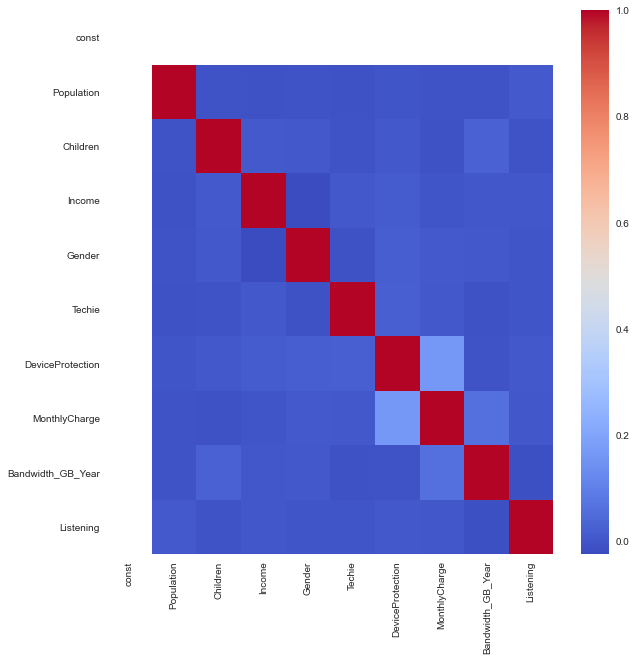

In [30]:
# Display heatmap to view correlation between predictor variables
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(Xfin3.corr(), cmap='coolwarm')
plt.show()

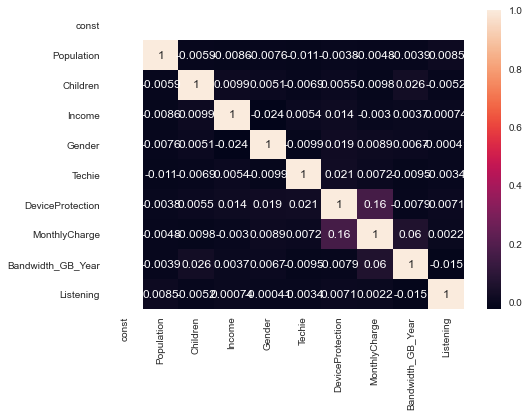

In [31]:
sns.heatmap(Xfin3.corr(), annot=True)
plt.show()

Variables are not highly correlated, which means we may have the final model. I will double check for multicollinearity using Variable Inflation Factor analysis.

In [32]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = Xfin.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Xfin.values, i) 
                          for i in range(len(Xfin.columns))] 
  
print(vif_data)

                 feature        VIF
0                  const  81.815779
1             Population   1.001189
2               Children   1.002558
3                    Age   1.002349
4                 Income   1.001485
5                 Gender   1.001959
6     Outage_sec_perweek   1.001618
7                  Email   1.001770
8               Contacts   1.001292
9   Yearly_equip_failure   1.001120
10                Techie   1.001485
11            Port_modem   1.001200
12                 Phone   1.001595
13          OnlineBackup   1.103730
14      DeviceProtection   1.040278
15           StreamingTV   1.350033
16         MonthlyCharge   1.488423
17     Bandwidth_GB_Year   1.007482
18             Listening   1.001071


The VIF numbers for everything looks good. We have our final equation. 

## D3. Reduced Multiple Regression Model

4.093e-12 + 3.665e-17(Population) - 4.281e-13(Children) - 2.975e-14(Age) -8.171e-13(Gender) -1.364e-12 (OnlineBackup)

## E1. Model Comparison

The initial model of all numeric variables in the provided data set contained 33 independent variables. The inclusion of so many variables increased the R squared value, which describes how well the model fits, resulting in the perfect score of 1.0. 

Variables were removed first by considering their significance, by utilizing the calculation of their p-value from the model, and by recalculating the model after each deletion to again assess the p-value. Once the insignificant variables dropped, I then examined for instances of multicollinearity. Variables that highly linearly related are problematic for predictions, which suggests that certain variables are not truly independent of each other. 

To identify those variables, I tested for variance inflation factors (VIF) which measures how much individual variables are influenced by other variables (Bhandari, 2020). As with p-values, lower scores are desirable for VIF and should ideally be under 5. In the tutorials that I read, variables with similar scores were related and models improved when removing one of each related pair of variables. I did not see cases in my dataset where VIF scores were similar to be able to decide between two variables. In my final model, there were seven independent variables, meaning 60 were removed.

My final model had an R2 value of 1.0. This means that the regression model explains approximately 100.0% of the variation in the sample values of the amount of Bandwidth GB per Year. 

The residuals are plotted below. The first plot, or PredictionError plot, compares the actual values from the dataset against the predicted values from by the model to see how much variance is in the model. 

The line of best fit can then be compared against the 45-degree line, best identity, where the prediction exactly matches the model (McIntyre, 2018). 

The difference between the two is non-existent, meaning that there is evidence that the final model is reliable. The second residuals plot shows the error of prediction. 

An ideal residual plot would have points randomly distributed on either side of the axis. The plot is not random. Also, this plot includes a histogram of the error values on the right side which ideally is normally distributed around zero. The plotted histogram is nearly a perfect normal distribution curve, which suggests the higher accuracy of the model.

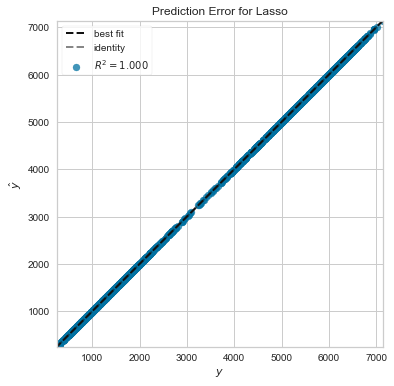

In [33]:
# Display prediction error plot to determine the amount of variance in model (ref 6)
mpl.rcParams['figure.figsize'] = (9,6)

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(Xfin3, y, test_size=0.2, random_state=42)

model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

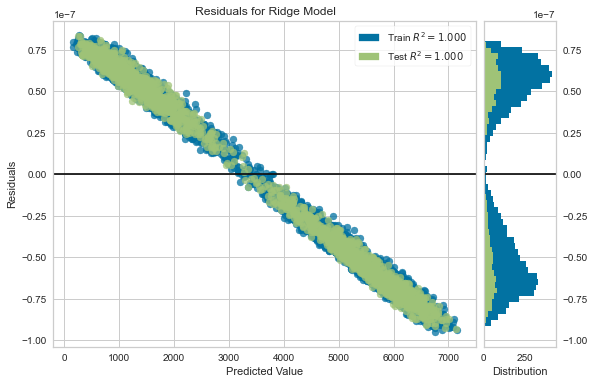

In [34]:
# Display residuals plot (ref 6)
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

# Part V: Data Summary and Implications

## F1. Results

### Reduced Multiple Linear Regression Model

4.093e-12 + 3.665e-17(Population) - 4.281e-13(Children) - 2.975e-14(Age) -8.171e-13(Gender) -1.364e-12 (OnlineBackup)

### Results

The equation of the final regression model is: y = 4.093e-12 + 3.665e-17(Population) - 4.281e-13(Children) - 2.975e-14(Age) -8.171e-13(Gender) -1.364e-12 (OnlineBackup)


### Interpretation of Statistical Significance of Model

The coefficients suggest that for every unit of of GB used in a year by the customer:

    Population - Will increase by 3.665e-17 units.
    Children - Will decrease by 4.281e-13 units.
    Age- Will decrease by 2.975e-14 units
    Gender- Will decrease by 8.171e-13 units
    OnlineBackup - Will decrease by 1.364e-12 units.


### Limitations of the Data Analysis

The data set is small, and the time period it was collected is unknown. The data set is not representative of current trends. To gain an accurate insight, the data would need to include recent data to be train the model appropriately. The current data set is only representative of time when it was collected. There is also no time period noted for when the data was collected, so we do not know what time period is model is representative of. The data may be affected by seasonality or a bad economy, which would affect the model's relevance. 
 
Correlation is not causation. We cannot generalize whether large amounts of gigabyes used by customers is directly related to the number of customer children, gender, or population. Each group has smaller groups within it. With age for example, we may see certain age groups using large amounts of bandwidth than other customers. Internet useage may even be different higher for some genders in areas with high population, and others with low population - population areas need to be defined and specified for a better model. 

### Recommendations

Since there is a direct linear relationship between bandwidth used yearly and a customer having a online backup, I would suggest a service add on for a customer to back up their information. This could be either on the cloud or a SSD device that could be purchased with service. However, we would need to check with the customer what sorts of files/data they are storing on the cloud. The answer to that could impact what sorts of add ons we could sell or market to them. 

Since children decrease the number of average GB used per year, we could suggest certain internet packages targeted towards families. For example, we could bundle kids channels in exchange for higher bandwith limits or faster speeds. This would incentivize customers to purchase larger packages that are profitable in the long run. 

Since the amount of GBs used decreases with age, we could target customers with streaming packages paired with their interests, such as streaming TV services or channels that appeal to that age segment. 


### Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=137cb112-6660-48e2-960b-ad7e0114e72b

#### Sources
1. Bhandari, Aniruddha. “What Is Multicollinearity? Here’s Everything You Need to Know.” Analytics Vidhya, 16 Apr. 2020, www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/.

2. Kautumn06. “Yellowbrick — Regression Visualizer Examples.” Kaggle, 18 Aug. 2018, www.kaggle.com/kautumn06/yellowbrick-regression-visualizer-examples.

3. Massaron, Luca, and Alberto Boschetti. Regression Analysis with Python. Packt Publishing, 2016.

4. McKinney, W. &ensp; (2018). &ensp; <i>Python for Data Analysis</i>. O'Reilly.

5. Walker, Michael. <i>Python Data Cleaning Cookbook: Modern Techniques and Python Tools to Detect and Remove Dirty Data and Extract Key Insights.</i> Packt Publishing, 2020.



#### Third Party Code
1. Farrell, Peter, et al. The Statistics and Calculus with Python Workshop: A Comprehensive Introduction to Mathematics in Python for Artificial Intelligence Applications. Packt Publishing, 2020.
2. https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe/51672855
3. https://analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/ 
